<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%EC%9D%98%EB%A3%8C%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8_%ED%95%99%EC%8A%B5_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 학습시킨 모델을 SGD 방식으로 학습해보기
- SGDRegressor 클래스 활용
- 초기값\
학습률:0.001\
학습량: 1000\
규제: None
- 그결과 분석
- SVD-OLS방식의 풀이와 MSE 어떤차이를 보이는지
- 수업에서 다룬 분석과정을 반복
- 변경상수(하이퍼파라미터)조정으로 여러 SGD 를 학습
- 학습시간 비교

# 📌SGD 방식으로 학습 -선형 회귀모델


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data_path='/content/insurance.csv'
insurance_data=pd.read_csv(data_path)


In [39]:
# 한글 이슈 해결 - Colab
#폰트설치나눔폰트패키지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,885 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

### 카테고리형 변수 인코딩

In [40]:
insurance_encoded=pd.get_dummies(insurance_data, drop_first=True)
insurance_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


### 학습 및 평가 데이터 분리

In [41]:
# 종속변수를 charges 로 지정
y_column=['charges']

# charges 열을 제외한 나머지 모든 열을 x에 저장 , axis=1 은 열방향으로 drop
X=insurance_encoded.drop(y_column, axis=1)

# charges 열만 y 에 저장
y=insurance_encoded[y_column]

# x, y 를 학습용 데이터와 테스트용 데이터로 나눔
# test_size=0.2 전체 데이터의 20%를 테스틑 데이터로 사용 나머지 80%를 학습데이터로 사용
# random_state=42 데이터분할하는 방식을 재현가능하게 하기위한 난수시드 .
#test data= 268 train data= 1070
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


### 특성 스케일링 StandardScaler 사용

In [42]:
''' insurance_encoded 데이터 프레임에 있는 열들중
원본 데이터 프레임인 insurance_data에는 없고 인코딩 열들만
endoded_columns 리스트에 저장 (지역3개 , smoker_yes , sex_male )'''

encoded_columns=list(set(insurance_encoded.columns)
-set(insurance_data.columns))

'''insurance_encoded 데이터 프레임에 있는 열들중 인코딩된 열들과 타겟charges를 제외한
나머지 열들을 리스트에 저장 ( bmi , age, children)'''

continuous_columns=list(set(insurance_encoded.columns)
-set(encoded_columns)-set(y_column))

# StandardScaler 객체 생성해 scaler 변수 저장
scaler=StandardScaler()

'''학습용/ 테스트용 데이터의 수치형 열들에 대해 표준화
fit_transform 메서드는 데이터변환하고 반환'''
X_train_continuous=scaler.fit_transform(X_train[continuous_columns])
X_test_continuous=scaler.fit_transform(X_test[continuous_columns])

# 표준화된 학습용 데이터와 테스트용 데이터를 각각 데이터프레임으로
X_train_continuous_df=pd.DataFrame(X_train_continuous, columns=continuous_columns)
X_test_continuous_df=pd.DataFrame(X_test_continuous, columns=continuous_columns)

# 학습용 데이터와 테스트용 데이터의 인코딩된 열들만 추출하고 인덱스를 초기화함
X_train_categorical_df=X_train[encoded_columns].reset_index(drop=True)
X_test_categorical_df=X_test[encoded_columns].reset_index(drop=True)

# 표준화된 수치형 데이터와 인코딩된 범주형 데이터 결함
X_train_final=pd.concat([X_train_continuous_df, X_train_categorical_df], axis=1)
X_test_final=pd.concat([X_test_continuous_df, X_test_categorical_df], axis=1)


기존 선형 회귀 모델 학습

In [43]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 초기화 및 학습
linear_reg= LinearRegression()
linear_reg.fit(X_train_final, y_train)

# 모델의 계수 출력
print(linear_reg.coef_)
#모델의 절편 출력
print(linear_reg.intercept_)

[[ 2.03622812e+03  3.61497541e+03  5.16890247e+02 -8.09799354e+02
  -6.57864297e+02 -1.85916916e+01  2.36511289e+04 -3.70677326e+02]]
[8955.2448015]


## SGD 방식의 선형 회귀 모델 학습

초기값
학습률:0.001
학습량: 1000
규제: None

In [44]:
# 확률적 경사 하강법 (Stochastic Gradient Descent)
from sklearn.linear_model import SGDRegressor
# 초기 학습률 learning rate 0.001
init_learning_rate=0.001
# 학습량 1000
epoch=1000
# 규제 None
penalty=None

In [45]:
sgd_reg=SGDRegressor(eta0=init_learning_rate,
                     max_iter=epoch,
                     penalty=penalty,
                     random_state=1234
                     )

In [46]:
sgd_reg.fit(X_train_final, y_train.values.flatten())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.001, penalty=None, random_state=1234)

SGD 모델 성능 확인 MSE

In [47]:
from sklearn.metrics import mean_squared_error
# sgd_reg 객체 활용 학습/테스트 데이터 대한 예측값 저
y_train_pred = sgd_reg.predict(X_train_final)
y_test_pred= sgd_reg.predict(X_test_final)

# 평균제곱오차 사용
# 실제값과 예측값의 차이 제곱한후 모든 평균
mse_train=mean_squared_error(y_train, y_train_pred)
mse_test=mean_squared_error(y_test, y_test_pred)

print('SGD 학습데이터 MSE 값:', mse_train)
print('SGD 평가 데이터 MSE 값:', mse_test)

print('기존 학습데이터 MSE값:', mean_squared_error(y_train, linear_reg.predict(X_train_final)))
print('기존 평가 데이터 MSE값:', mean_squared_error(y_test, linear_reg.predict(X_test_final)))

SGD 학습데이터 MSE 값: 37287543.082482524
SGD 평가 데이터 MSE 값: 33671960.42875808
기존 학습데이터 MSE값: 37277681.70201866
기존 평가 데이터 MSE값: 33585879.168265626


시각화 하기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


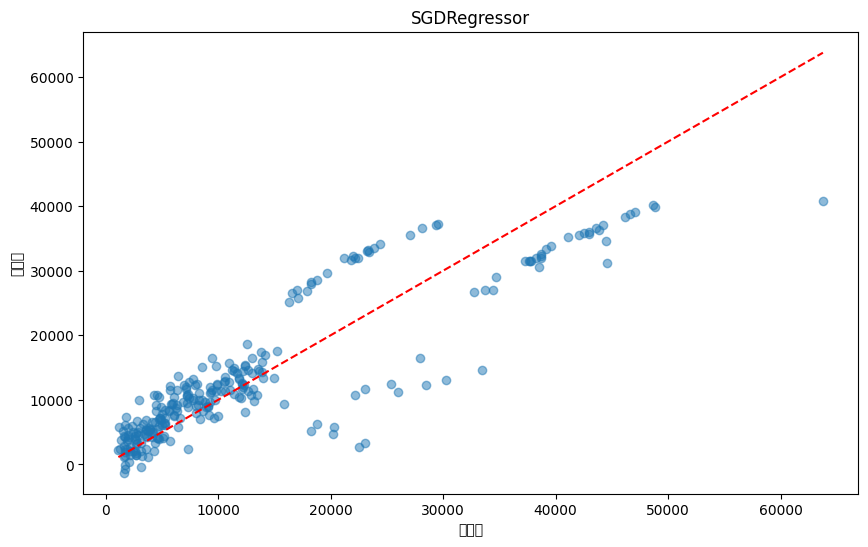

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# 산점도 그리기 실제값과 예측값을 매핑하여 점찍어 alpah=점의 투명도
plt.scatter(y_test, y_test_pred, alpha=0.5)

# 대각선 선을 그리기
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('SGDRegressor')
plt.show()

변수 영향력 파악하기


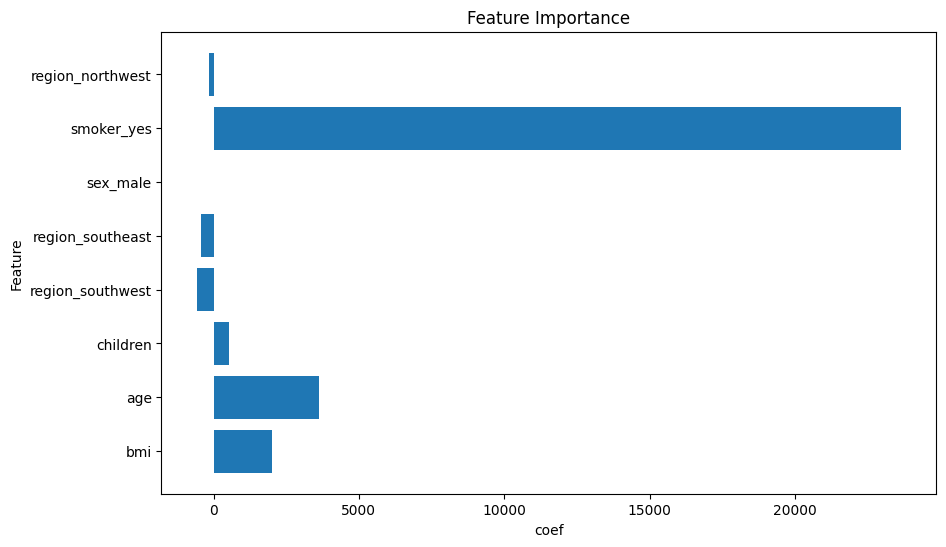

In [49]:
plt.figure(figsize=(10,6))
# 수평 막대 그래프 barh
# X_train_final 데이터피처들의 이름 가져옴
# sgd_reg.coef_.flatten() SGD회귀모델이 학습한 각 특성에대한 계수(가중치)를 1차원 배열로 변환 (X축)
plt.barh(X_train_final.columns, sgd_reg.coef_.flatten())
plt.xlabel("coef")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

잔차분석

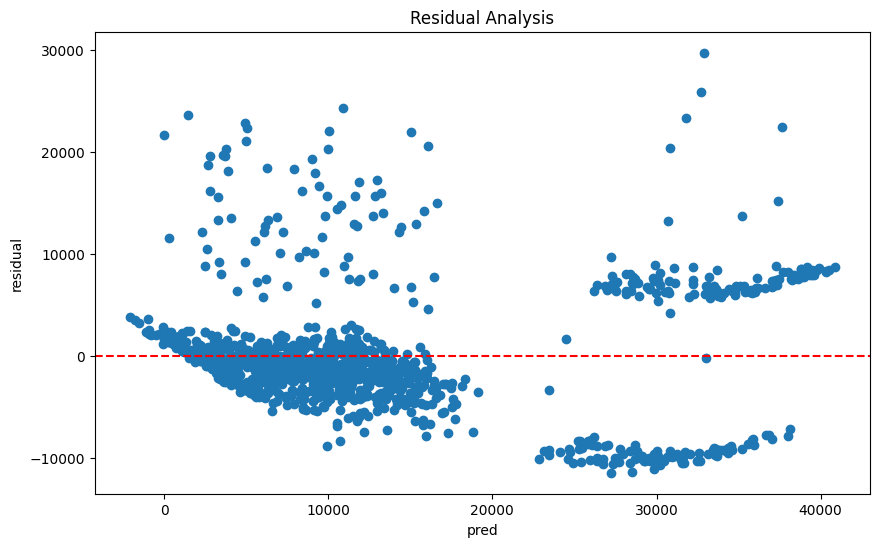

In [50]:
y_pred=sgd_reg.predict(X_train_final)

# 실제값 y_train.values.flatten()-> 1차원배열로변 과 예측값 y_pred 차이
residuals=y_train.values.flatten()-y_pred
plt.figure(figsize=(10,6))
#산점도 그리기
plt.scatter(y_pred,residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('pred')
plt.ylabel('residual')
plt.title('Residual Analysis')
plt.show()



### 하이퍼파라미터

In [54]:
# GridSerchCV 교차 검증을 사용, 최적의 하이퍼 파라미터 조합 찾는데 사용
from sklearn.model_selection import GridSearchCV

init_learning_rate=0.001
schedular='constant'
epoch=1000
penalty=None

sgd_reg=SGDRegressor(max_iter=epoch,
                     eta0=init_learning_rate,
                     learning_rate=schedular,
                     penalty=penalty,
                     random_state=42)



In [55]:
# 하이퍼파라미터의 가능한 값들을 정의한 그리드를 설정(param_grid)
param_grid={
    'max_iter':[1000], #최대반복횟수
    'eta0' : [1,0.1,0.01,0.001,0.0001,0.00001], #초기학습률, ..값들을 탐색
    'penalty' : ['l2','l1',None]
    # 규제종류 l2:릿지회귀 l1: 라쏘회귀
}

#GridSearchCV객체 생성
# 1. SGDRegressor 모델로 여기서 하이퍼파라미터 튜닝 진행
# 2. 하이퍼 파라미터 그리드
# 3. 평균제곱오차MSE 를 모델성능평가로 사용 -> GridsearchCV에서 높은점수가 더 좋은모델이기에 음수로 변환
# 4. n_jobs=-1 가능한 모든프로세서 사용, 병렬로 작업 수행
grid_search=GridSearchCV(SGDRegressor(random_state=42),
                                      param_grid, scoring='neg_mean_squared_error'
                                      , n_jobs=-1)

grid_search.fit(X_train_final, y_train.values.flatten())




GridSearchCV(estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'max_iter': [1000], 'penalty': ['l2', 'l1', None]},
             scoring='neg_mean_squared_error')

In [56]:
# 최고성능일 경우 하이퍼파라미터
grid_search.best_params_

{'eta0': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

In [57]:
# 최고 성능 수치
# neg_mean_squared_error 입력! -부호주의
grid_search.best_score_

-37941072.07242168

In [59]:
# 전체 결과 분석
results=pd.DataFrame(grid_search.cv_results_)

#관심 컬럼만 선택 정리
columns_of_interest=['mean_test_score', 'param_eta0', 'param_penalty']
results=results[columns_of_interest]

#mean test score 기준 정렬
results=results.sort_values(by='mean_test_score', ascending=False)

results.head()

,mean_test_score,param_eta0,param_penalty
6,-3.794107e+07,0.01,l2
8,-3.794146e+07,0.01,None
7,-3.794146e+07,0.01,l1
9,-3.794807e+07,0.001,l2
11,-3.794841e+07,0.001,None
